# Table of Contents
* [Une introduction à Pandas](#Une-introduction-à-Pandas)
	* [Rappel - IPython](#Rappel---IPython)
	* [Rappel - Numpy](#Rappel---Numpy)
	* [RPY2](#RPY2)
* [Quelques fonctions utiles pour la présentation](#Quelques-fonctions-utiles-pour-la-présentation)
* [Pandas -- Les séries](#Pandas----Les-séries)
	* [Créer des séries](#Créer-des-séries)
	* [Accéder aux éléments](#Accéder-aux-éléments)
	* [Les séries comme un dictionnaire](#Les-séries-comme-un-dictionnaire)
* [DataFrames](#DataFrames)
	* [Introduction](#Introduction)
	* [Accéder aux données :](#Accéder-aux-données-:)
		* [Les index](#Les-index)
		* [Modifier un dataframe : affectation, apply, applymap](#Modifier-un-dataframe-:-affectation,-apply,-applymap)
		* [Index hiérarchique](#Index-hiérarchique)
			* [Guido](#Guido)
			* [Population](#Population)
		* [Données manquantes](#Données-manquantes)
		* [Concaténer, joindre, etc](#Concaténer,-joindre,-etc)
		* [Merge et join](#Merge-et-join)
	* [Group operations: Split-Apply-Combine](#Group-operations:-Split-Apply-Combine)
	* [pivot_table](#pivot_table)
	* [Non traité](#Non-traité)
	* [Annexe: Récupération de la table sur les départements](#Annexe:-Récupération-de-la-table-sur-les-départements)


In [ ]:
import pandas as pd
import numpy as np

# Une introduction à Pandas

La bibliothèque [Pandas](http://pandas.pydata.org/) est une bibliothèque d'analyse de données parfois qualifiée de "*R pour Python*". Le but de ces quelques notes est de présenter les principales fonctionnalités, étant bien entendu que cela ne fait qu'effleurer le sujet et ne peut remplacer la consultation de la [documentation](http://pandas.pydata.org/pandas-docs/stable/) et l'expérimentation.

In [180]:
from IPython.display import IFrame
IFrame('http://pandas.pydata.org/', width=700, height=350)

Avant de passer à Pandas proprement dit, quelques rappels et outils:

## Rappel - IPython

IPython is a fancy python console.  Try running ``ipython`` on your command line.  Some IPython tips

```python
# Special commands, 'magic functions', begin with % or %%
%quickref, %who, %run, %reset, %%load, %%file
# Shell Commands
ls, cd, pwd, mkdir
# Need Help?
help(), help(obj), obj?, function?
# Tab completion of variables, attributes and methods
```

## Rappel - Numpy

In [181]:
#%%file pouet.py 
#1d vector
data = np.arange(20)
print(data, "\n\nshape :", data.shape, "\n\ntype : ", type(data))
#print(f"data {data}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

shape : (20,) 

type :  <class 'numpy.ndarray'>


In [182]:
# make it a 4,5 array
data = np.arange(20).reshape(4, 5)
print(data, "\n\nshape :", data.shape, "\n\ntype : ", type(data))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]] 

shape : (4, 5) 

type :  <class 'numpy.ndarray'>


In [183]:
# extraire une colonne
data[:, 1]

array([ 1,  6, 11, 16])

In [184]:
# extraire une ligne
data[1, :]

array([5, 6, 7, 8, 9])

In [185]:
# slices
data[2:4, 2:4]

array([[12, 13],
       [17, 18]])

## RPY2

Le package RPY2 permet d'exécuter du code R dans un notebook Jupyter, en se connectant à un noyau R installé par ailleurs, en transférant les données d'entrée-sortie.

In [ ]:
#!pip3 install rpy2 --user --upgrade #Pour installer rpy2 en mode utilisateur

In [ ]:
%load_ext rpy2.ipython

Exécutons du code R : il suffit d'utiliser la `magic` %%R

In [ ]:
%%R -o a
a = c(0, 1, 2, 3)
print(a)

In [ ]:
type(a)

In [ ]:
a

In [ ]:
np.array(a, dtype=float)

Datas issues de [http://data.worldbank.org](http://data.worldbank.org)

In [186]:
cellular = pd.read_csv("cellular.csv", header=2, sep=",")

In [ ]:
cellular.columns

In [ ]:
%%R
census=read.csv("census.csv")
library(caTools)
set.seed(2000)
spl=sample.split(census$over50k, SplitRatio = 0.6)
censusTrain = subset(census, spl==TRUE)
censusTest = subset(census, spl==FALSE)
summary(census)

# Quelques fonctions utiles pour la présentation

In [188]:
def random_letters(size=1,maxletter=52):
    import string
    return [string.ascii_letters[k] 
            for k in np.random.randint(0,maxletter,size=size)]
z=random_letters(12,52)
z

['L', 'y', 'w', 'i', 'L', 'u', 'i', 'd', 'v', 'W', 'q', 'B']

In [189]:
def disp(expr):
    from IPython.display import HTML, display
    display(HTML( '<b style="color:blue"> {} </b>'.format(expr)))
    print(eval(expr))
disp("z")
disp("[x.upper() for x in z]")

['L', 'y', 'w', 'i', 'L', 'u', 'i', 'd', 'v', 'W', 'q', 'B']


['L', 'Y', 'W', 'I', 'L', 'U', 'I', 'D', 'V', 'W', 'Q', 'B']


In [190]:
def convint(x):
    import re
    if x is not np.nan: 
        if isinstance(x,str): 
            x=x.replace('\xa0','')
            x=x.replace(' ','')
            x=re.sub(r'\[\S+\]','',x)
        if x=='': return 0
        if x=='NR': return 0
        try:
            return int(x)
        except:
            return np.nan


![](panda-giving-another-panda-a-hand-sm.jpg)

# Pandas -- Les séries

Le type pandas Series est un tableau 1d de données **indexées**.

## Créer des séries

Elle peut être créée à partir d'une liste ou d'un array comme suit :

Deux séries s1 et s2

In [191]:
s1=pd.Series(np.random.randn(5))
s2=pd.Series(random_letters(5))
s2

0    g
1    i
2    V
3    h
4    u
dtype: object

Les séries possèdent un `index` ; c'est ce qui les distingue des nd.arrays. Par défaut, l'index est une suite d'entiers, mais ce peut-être ce qu'on veut:

In [192]:
s2.index

RangeIndex(start=0, stop=5, step=1)

In [193]:
list(s2.index)

[0, 1, 2, 3, 4]

In [194]:
s2.index=['bateau', 'soleil', 'mer', 'sable', 'vacances']
print(s2, '\n\n', s1)

bateau      g
soleil      i
mer         V
sable       h
vacances    u
dtype: object 

 0   -0.73525
1    0.53114
2    0.66592
3   -0.75589
4   -0.79667
dtype: float64


## Accéder aux éléments

On peut accéder aux éléments suivant l'adressage classique, à savoir

In [195]:
s2[1]

'i'

mais aussi via les clés d'index :

In [196]:
s2['soleil']

'i'

Bien entendu, on peut regarder des tranches (slices)

In [197]:
s1[2:4] #l'index de fin est exclu

2    0.66592
3   -0.75589
dtype: float64

In [198]:
s2[2:4] #l'index de fin est exclu

mer      V
sable    h
dtype: object

In [199]:
s2['mer':'sable'] #l'index de fin est **inclu**

mer      V
sable    h
dtype: object

Mais si on a une série avec des index entiers, on peut commencer à se poser des questions... quel est l'index qui est effectivement utilisé ?

In [203]:
s3=pd.Series(random_letters(7), index=range(2,9))
s3

2    x
3    F
4    w
5    A
6    U
7    E
8    x
dtype: object

In [204]:
s3[2]  #<-- 2 est la clé et non l'index entier

'x'

In [202]:
s3[2:4] # la slice est calculée avec les indices **implicites**

4    m
5    I
dtype: object

Pour éviter les ambiguités, on a **.loc** et **.iloc** (location et implicit location)

In [205]:
# .loc utilise les index explicites
print("s3.loc[2]-->", s3.loc[2])
print("s3.loc[2:4]-->","\n", s3.loc[2:4]) #indice final _inclu_

s3.loc[2]--> x
s3.loc[2:4]--> 
 2    x
3    F
4    w
dtype: object


In [206]:
# .iloc utilise les index implicites
print("s3.iloc[2]", s3.iloc[2])
print("s3.iloc[2:4]","\n", s3.iloc[2:4]) #indice final _exclu_

s3.iloc[2] w
s3.iloc[2:4] 
 4    w
5    A
dtype: object


## Les séries comme un dictionnaire

Les séries peuvent aussi être vues comme un dictionnaire spécialisé, doté de méthodes supplémentaires

In [207]:
s=pd.Series({'a':22, 'b':13, 'a':41})
s

a    41
b    13
dtype: int64

ou encore

In [208]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
#
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

A noter que si on construit la série à partir d'un dictionnaire, alors **les clés sont uniques et  triées** : une Series est un dictionnaire spécialisé dont les clés sont (généralement) ordonnées. 


Cas d'une clé dupliquée

In [215]:
s=pd.Series([22, 13, 41, np.nan], index=['a','b','a', 'b'])
s

a    22.0
b    13.0
a    41.0
b     NaN
dtype: float64

In [210]:
s['a']  # ou s.a

a    22.0
a    41.0
dtype: float64

Valeurs manquantes

In [213]:
s.dropna(inplace=True)  ##inplace=False

In [214]:
s

a    22.0
b    13.0
a    41.0
dtype: float64

In [216]:
s.fillna(s.mean())  ##inplace=False

a    22.00000
b    13.00000
a    41.00000
b    25.33333
dtype: float64

In [217]:
s.name = "ma série"
print('s : ') 
print(s)
print('\ns.index',s.index)
print('\ns.values',s.values)

s : 
a    22.0
b    13.0
a    41.0
b     NaN
Name: ma série, dtype: float64

s.index Index(['a', 'b', 'a', 'b'], dtype='object')

s.values [22. 13. 41. nan]


** Filtrage, opérations arithmétiques : ces opérations préservent l'index. **

In [218]:
s = pd.Series(data=np.random.normal(size=10), index=random_letters(10))
disp('s')

O    1.84441
n    2.79898
F    0.91813
S   -0.41575
M   -1.17561
a    0.11097
f   -0.09121
d    0.58251
f    0.03831
S   -0.62103
dtype: float64


In [219]:
disp('s[(s>0.2) & (s<1.2)]')  # masking

F    0.91813
d    0.58251
dtype: float64


In [222]:
disp('s.map(lambda x: x+2)')  # <--- map operation
disp('np.exp(s)') # numpy operation on series

O    3.84441
n    4.79898
F    2.91813
S    1.58425
M    0.82439
a    2.11097
f    1.90879
d    2.58251
f    2.03831
S    1.37897
dtype: float64


O     6.32434
n    16.42782
F     2.50461
S     0.65984
M     0.30863
a     1.11736
f     0.91283
d     1.79052
f     1.03905
S     0.53739
dtype: float64


Le fait d'avoir un index explicite a des conséquences sur les manipulations des séries, car **les opérations ne se font qu'avec des index alignés**. Considérons quelques exemples :

In [221]:
s1=pd.Series(np.random.randn(4), index=list('abcd'))
s2=pd.Series(np.random.randn(4), index=list('wcbd'))
disp('s1')
disp('s2')
disp('s1+s2')

a   -0.32815
b   -0.37819
c   -1.24455
d    0.57562
dtype: float64


w   -0.37988
c    1.01084
b   -0.27283
d    0.04685
dtype: float64


a        NaN
b   -0.65102
c   -0.23371
d    0.62247
w        NaN
dtype: float64


# DataFrames

## Introduction

Le nom de pandas dérive de `panel data`, un terme courant en économétrie. Un article de référence est [pyhpc2011](http://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf). 

La structure fondamentale de pandas est celle des dataframes. La figure suivante est extraite du livre de [Wes McKinney](https://www.amazon.fr/Python-Data-Analysis-Wes-Mckinney/dp/1449319793/ref=sr_1_1?ie=UTF8&qid=1443455134&sr=8-1&keywords=Python+for+Data+Analysis)
![](DataFrame.png)

In [223]:
p1 = pd.read_csv("dpts_pop.csv")
p1.index = p1.iloc[:, 0].values  # prend comme nouvel index le contenu de la colonne 0
p1 = p1.drop(['Unnamed: 0', '2015'], axis=1)  # supprime la colonne
p1.columns = p1.columns.astype(int)
p1 = p1.applymap(convint)
p1.head()

,1931,1999,2008,2010,2011,2012
Nord,2029449.0,2555020,2564959,2576770.0,2579208.0,2587128
Paris,2891020.0,2125246,2211297,2243833.0,2249975.0,2240621
Bouches-du-Rhône,1101672.0,1835719,1966005,1972018.0,1975896.0,1984784
Hauts-de-Seine,949231.0,1428881,1549619,1572490.0,1581628.0,1586434
Seine-Saint-Denis,769315.0,1382861,1506466,1522048.0,1529928.0,1538726


In [224]:
pop = p1.copy()

In [225]:
p2 = pd.read_csv("dpts_tab.csv")
p2 = p2.drop(labels=[0, 1], axis=0)
p2.index = p1.index
p2 = p2.drop(labels=['Unnamed: 0'], axis=1)
sup = p2['Superficie'].copy()
sup = sup.map(convint)
sup.head()

Nord                 5743
Paris                 105
Bouches-du-Rhône     5087
Hauts-de-Seine        176
Seine-Saint-Denis     236
Name: Superficie, dtype: int64

Comme sous R, on a des méthodes pour afficher le début ou la fin du dataframe, ainsi qu'une description statistique

In [226]:
pop.head()

,1931,1999,2008,2010,2011,2012
Nord,2029449.0,2555020,2564959,2576770.0,2579208.0,2587128
Paris,2891020.0,2125246,2211297,2243833.0,2249975.0,2240621
Bouches-du-Rhône,1101672.0,1835719,1966005,1972018.0,1975896.0,1984784
Hauts-de-Seine,949231.0,1428881,1549619,1572490.0,1581628.0,1586434
Seine-Saint-Denis,769315.0,1382861,1506466,1522048.0,1529928.0,1538726


In [227]:
pop.tail()

,1931,1999,2008,2010,2011,2012
Corse-du-Sud,NaN,118593,140953,143600.0,145846.0,145429
Territoire de Belfort,99403.0,137408,141958,142911.0,143348.0,143940
Hautes-Alpes,87566.0,121419,134205,136971.0,138605.0,139554
Creuse,207882.0,124470,123907,123029.0,122560.0,121517
Lozère,101849.0,73509,76973,77082.0,77156.0,76889


In [228]:
pop.describe()

,1931,1999,2008,2010,2011,2012
count,9.60000e+01,1.02000e+02,1.02000e+02,1.01000e+02,1.01000e+02,1.02000e+02
mean,4.34762e+05,5.91345e+05,6.29245e+05,6.39852e+05,6.42905e+05,6.41705e+05
std,3.76648e+05,4.61551e+05,4.86831e+05,4.91877e+05,4.94475e+05,4.96596e+05
min,0.00000e+00,0.00000e+00,0.00000e+00,0.00000e+00,0.00000e+00,0.00000e+00
25%,2.50684e+05,2.85509e+05,2.86218e+05,2.91642e+05,2.90891e+05,2.84587e+05
50%,3.34513e+05,4.90266e+05,5.09272e+05,5.24358e+05,5.25931e+05,5.13372e+05
75%,4.95180e+05,7.31838e+05,7.93500e+05,8.03595e+05,8.05642e+05,8.06614e+05
max,2.89102e+06,2.55502e+06,2.56496e+06,2.57677e+06,2.57921e+06,2.58713e+06


In [229]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, Nord to Lozère
Data columns (total 6 columns):
1931    96 non-null float64
1999    102 non-null int64
2008    102 non-null int64
2010    101 non-null float64
2011    101 non-null float64
2012    102 non-null int64
dtypes: float64(3), int64(3)
memory usage: 5.6+ KB


In [231]:
pop.isnull().sum()

1931    6
1999    0
2008    0
2010    1
2011    1
2012    0
dtype: int64

In [232]:
def random_df(size):
    import string
    letters = string.ascii_letters
    return pd.DataFrame(
        np.random.uniform(size=size),
        index=[letters[k] for k in range(size[0])],
        columns=['col_' + str(k) for k in range(size[1])])


a = random_df((4, 5))
a

,col_0,col_1,col_2,col_3,col_4
a,0.87113,0.41697,0.92068,0.87189,0.01676
b,0.14323,0.38217,0.12241,0.59213,0.81141
c,0.68076,0.54543,0.04853,0.46914,0.41446
d,0.39695,0.47880,0.89917,0.85789,0.34518


## Accéder aux données :

Comment extrait-on des données d'un dataframe ?

In [233]:
df = random_df((4, 5))
df

,col_0,col_1,col_2,col_3,col_4
a,0.92034,0.89475,0.86552,0.09942,0.07140
b,0.23628,0.83111,0.40242,0.37007,0.37958
c,0.19456,0.64392,0.43317,0.61135,0.09888
d,0.62180,0.89832,0.72063,0.87545,0.18662


### Les index

Les dataframes possèdent un index pour les lignes et un index pour les colonnes: 

In [234]:
disp("df.columns")
disp("df.index")

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4'], dtype='object')


Index(['a', 'b', 'c', 'd'], dtype='object')


On peut accéder directement **aux colonnes** via

In [235]:
df['col_1']

a    0.89475
b    0.83111
c    0.64392
d    0.89832
Name: col_1, dtype: float64

! (pour un  array numpy, disons a, la commande `a[1]` donne accès à la 2e **ligne** de a). 

Mais **si on slice**, le slice par défaut est sur les lignes, et ne fonctionne pas sur les colonnes :


In [236]:
disp("df['col_1':'col_2']")
disp("df['a':'c']")

Empty DataFrame
Columns: [col_0, col_1, col_2, col_3, col_4]
Index: []


     col_0    col_1    col_2    col_3    col_4
a  0.92034  0.89475  0.86552  0.09942  0.07140
b  0.23628  0.83111  0.40242  0.37007  0.37958
c  0.19456  0.64392  0.43317  0.61135  0.09888


`df['a':'c']` retourne un dataframe, dont on peut extraire une colonne, forcément.

In [237]:
disp("df['a':'c']['col_1']")

a    0.89475
b    0.83111
c    0.64392
Name: col_1, dtype: float64


Comme pour les Series, on dipose d'un indiçage explicite et implicite en `loc` et `iloc`, ainsi que d'une version hybride, `ix`. 

In [238]:
disp("df")
disp("df.iloc[2,:]   # Axe 0 --> les lignes")
# ici la ligne 2

     col_0    col_1    col_2    col_3    col_4
a  0.92034  0.89475  0.86552  0.09942  0.07140
b  0.23628  0.83111  0.40242  0.37007  0.37958
c  0.19456  0.64392  0.43317  0.61135  0.09888
d  0.62180  0.89832  0.72063  0.87545  0.18662


col_0    0.19456
col_1    0.64392
col_2    0.43317
col_3    0.61135
col_4    0.09888
Name: c, dtype: float64


In [239]:
disp("df.iloc[:,1]   # Axe 1 --> les colonnes")
# ici la colonne 1

a    0.89475
b    0.83111
c    0.64392
d    0.89832
Name: col_1, dtype: float64


On peut extraire une sous table simplement

In [240]:
disp("df.iloc[1:3,1:3]   #(bornes sup exclues)")

     col_1    col_2
b  0.83111  0.40242
c  0.64392  0.43317


ainsi qu'en indice explicite:

In [241]:
disp("df.loc['b':'c','col_1':'col_2']   #(bornes sup inclues)")

     col_1    col_2
b  0.83111  0.40242
c  0.64392  0.43317


ou encore avec un indice hybride (implicite/explicite)

In [242]:
disp("df.ix[1:3,'col_1':'col_2']   #(bornes sup exclues/inclues)")

     col_1    col_2
b  0.83111  0.40242
c  0.64392  0.43317


/home/bercherj/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


En réalité, `.ix` est d'abord basé sur les labels, mais utilise un adressage basé sur les indexs entiers si un label ne peut-être trouvé ; sauf dans le cas ou les labels seraient eux-même des entiers..

Lorsqu'on effectue un calcul sur l'axe 0 (les lignes), le résultat est donc fonction des index des colonnes ; et réciproquement

In [243]:
df.median(axis=0)

col_0    0.42904
col_1    0.86293
col_2    0.57690
col_3    0.49071
col_4    0.14275
dtype: float64

In [ ]:
df.mean(axis=1)

### Modifier un dataframe : affectation, apply, applymap

Affecter une colonne inexistante crée simplement une nouvelle colonne !

In [244]:
df1 = random_df((3, 5))
disp("df1")
df1['nouveau'] = np.random.randint(0, 10, size=3)
disp("df1")

     col_0    col_1    col_2    col_3    col_4
a  0.47132  0.83981  0.84531  0.07057  0.32983
b  0.49628  0.13525  0.76603  0.13320  0.41124
c  0.15381  0.66689  0.33608  0.47664  0.89300


     col_0    col_1    col_2    col_3    col_4  nouveau
a  0.47132  0.83981  0.84531  0.07057  0.32983        6
b  0.49628  0.13525  0.76603  0.13320  0.41124        8
c  0.15381  0.66689  0.33608  0.47664  0.89300        4


Dès lors, on peut imaginer de faire des opérations directement sur les colonnes ; par exemple

In [249]:
notes = pd.DataFrame(
    data=np.random.randint(
        0, 20, size=(5, 5)),
    columns=['Note' + str(k) for k in range(5)],
    index=['Victor', 'Léa', 'Agnès', 'Benjamin', 'Mathieu'])
notes

,Note0,Note1,Note2,Note3,Note4
Victor,7,9,5,1,1
Léa,1,4,8,12,12
Agnès,3,4,18,15,0
Benjamin,14,3,17,19,11
Mathieu,5,8,15,9,19


In [250]:
notes['Note_pond'] = 0.4 * notes['Note2'] + 0.6 * notes['Note3']
notes['Note_max'] = np.max(notes.loc[:, 'Note2':'Note3'], axis=1)
notes

,Note0,Note1,Note2,Note3,Note4,Note_pond,Note_max
Victor,7,9,5,1,1,2.6,5
Léa,1,4,8,12,12,10.4,12
Agnès,3,4,18,15,0,16.2,18
Benjamin,14,3,17,19,11,18.2,19
Mathieu,5,8,15,9,19,11.4,15


Ou encore, on aurait envie d'appliquer une fonction sur les colonnes -- Pour cela, on a la méthode `apply`

In [251]:
notes.apply(np.max, axis=1)  #ou np.mean, np.std

Victor       9.0
Léa         12.0
Agnès       18.0
Benjamin    19.0
Mathieu     19.0
dtype: float64

In [252]:
notes = notes.drop(['Note_pond', 'Note_max'], axis=1)

On peut en fait utiliser n'importe quelle fonction qui reçoit une Series et rend ce qu'elle veut. 

In [253]:
new_notes = notes.apply(
    lambda x: 5 * (x - np.mean(x)) / np.std(x) + 12, axis=0)
new_notes

,Note0,Note1,Note2,Note3,Note4
Victor,13.11803,19.03465,4.63765,3.61112,6.70174
Léa,6.40983,8.68958,7.54384,12.65795,14.37027
Agnès,8.64590,8.68958,17.23114,15.12527,6.00460
Benjamin,20.94427,6.62056,16.26241,18.41503,13.67313
Mathieu,10.88197,16.96564,14.32495,10.19063,19.25025


L'air de rien, la fonction ci-dessus est très utile pour normaliser des données lorsqu'on applique certaines méthodes de traitement (clustering par exemple).

In [254]:
pd.set_option('precision', 5)
new_notes['Note_finale'] = new_notes.mean(axis=1)
new_notes['Notes_details'] = new_notes.apply(
lambda x: (np.mean(x), np.max(x), np.min(x), np.std(x)), axis=1)
new_notes

,Note0,Note1,Note2,Note3,Note4,Note_finale,Notes_details
Victor,13.11803,19.03465,4.63765,3.61112,6.70174,9.42064,"(9.420638261058544, 19.034650053120128, 3.6111..."
Léa,6.40983,8.68958,7.54384,12.65795,14.37027,9.93429,"(9.934294420877402, 14.370273392765931, 6.4098..."
Agnès,8.64590,8.68958,17.23114,15.12527,6.00460,11.13930,"(11.139298273728029, 17.23114374347187, 6.0046..."
Benjamin,20.94427,6.62056,16.26241,18.41503,13.67313,15.18308,"(15.183082048029542, 20.94427190999916, 6.6205..."
Mathieu,10.88197,16.96564,14.32495,10.19063,19.25025,14.32269,"(14.322686996306485, 19.250248024931086, 10.19..."


Parfois, on a également besoin d'appliquer une même fonction à l'ensemble des données. La méthode utile est alors `applymap`. 

In [255]:
def seuillage(x):
    return x if x > 6 else 6


#seuillage(12)

In [256]:
notes

,Note0,Note1,Note2,Note3,Note4
Victor,7,9,5,1,1
Léa,1,4,8,12,12
Agnès,3,4,18,15,0
Benjamin,14,3,17,19,11
Mathieu,5,8,15,9,19


In [257]:
notes.applymap(seuillage)

,Note0,Note1,Note2,Note3,Note4
Victor,7,9,6,6,6
Léa,6,6,8,12,12
Agnès,6,6,18,15,6
Benjamin,14,6,17,19,11
Mathieu,6,8,15,9,19


Conclusion : no more excel...
<img src="http://www.proaptivity.com/wp-content/uploads/2011/09/excel.jpg" height="200" width="200">

### Index hiérarchique

Il est aussi possible d'intégrer des index à plusiers niveaux, dits index hiérarchiques. Cela permet en fait de traiter sous la forme de dataframes 2D des objets de dimensions supérieures. 

#### Guido 

On peut créer un index hiérarchique à partir d'un `pd.MultiIndex.from_product`.

In [258]:
# From "Python data Science Handbook"
# hierarchical indices and columns
index = pd.MultiIndex.from_product(
    [[2013, 2014], [1, 2]], names=['year', 'visit'])
#
columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the dataframe
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  36.8  32.0  37.4  32.0  35.1
     2      39.0  35.8  35.0  37.7  37.0  37.5
2014 1      48.0  36.8  45.0  36.5  26.0  38.0
     2      48.0  37.0  29.0  35.9  49.0  37.7

In [259]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      32.0  37.4
     2      35.0  37.7
2014 1      45.0  36.5
     2      29.0  35.9

On peut alors accéder aux données de manière hiérarchique

In [260]:
health_data.loc[2014, 'Guido']

type,HR,Temp
visit,,
1,45.0,36.5
2,29.0,35.9


In [261]:
health_data.loc[2014, 'Guido'].loc[2, 'HR']

29.0

In [262]:
health_data.unstack()

subject   Bob                   Guido                     Sue              \
type       HR        Temp          HR        Temp          HR        Temp   
visit       1     2     1     2     1     2     1     2     1     2     1   
year                                                                        
2013     37.0  39.0  36.8  35.8  32.0  35.0  37.4  37.7  32.0  37.0  35.1   
2014     48.0  48.0  36.8  37.0  45.0  29.0  36.5  35.9  26.0  49.0  38.0   

subject        
type           
visit       2  
year           
2013     37.5  
2014     37.7

In [ ]:
health_data.reset_index()

#### Population

In [263]:
pop_small = pop.loc[:'Seine-Saint-Denis', 2010:2012]
disp("pop_small")
pops = pop_small.stack()
pops.name = "Population"
disp("pop_small.stack()")

                        2010       2011     2012
Nord               2576770.0  2579208.0  2587128
Paris              2243833.0  2249975.0  2240621
Bouches-du-Rhône   1972018.0  1975896.0  1984784
Hauts-de-Seine     1572490.0  1581628.0  1586434
Seine-Saint-Denis  1522048.0  1529928.0  1538726


Nord               2010    2576770.0
                   2011    2579208.0
                   2012    2587128.0
Paris              2010    2243833.0
                   2011    2249975.0
                   2012    2240621.0
Bouches-du-Rhône   2010    1972018.0
                   2011    1975896.0
                   2012    1984784.0
Hauts-de-Seine     2010    1572490.0
                   2011    1581628.0
                   2012    1586434.0
Seine-Saint-Denis  2010    1522048.0
                   2011    1529928.0
                   2012    1538726.0
dtype: float64


On a donc maintenant un double index :

In [264]:
pops['Nord'][2011]

2579208.0

In [265]:
sup_small = sup[:'Seine-Saint-Denis']
sup_small

Nord                 5743
Paris                 105
Bouches-du-Rhône     5087
Hauts-de-Seine        176
Seine-Saint-Denis     236
Name: Superficie, dtype: int64

In [266]:
densites = pop_small.apply(lambda x: x / sup_small)
densites

,2010,2011,2012
Nord,448.68013,449.10465,450.48372
Paris,21369.83810,21428.33333,21339.24762
Bouches-du-Rhône,387.65834,388.42068,390.16788
Hauts-de-Seine,8934.60227,8986.52273,9013.82955
Seine-Saint-Denis,6449.35593,6482.74576,6520.02542


In [ ]:
newtab = pd.DataFrame({"Population": pops, "Densité": densites.stack()})
newtab

In [ ]:
newtab.index

In [ ]:
newtab.unstack()

### Données manquantes

Assigning a column that doesn’t exist will create a new column.  If you assign a Series, it will be instead conformed exactly to the
DataFrame’s index, inserting missing values in any holes:

On insère une colonne dans la DF, mais aligne avec l'index de la DF 
 (la ligne 'Inconnu' n'est pas ajoutée)

In [267]:
new_index = pop.index.insert(2, 'Inconnu')
disp("new_index[:5]")
val = pd.Series(
    np.random.randint(
        2000, 10000, size=new_index.size), index=new_index)
# insère une colonne dans la DF, mais aligne avec l'index de la DF 
# (la ligne 'Inconnu' n'est pas ajoutée)
pop['newcol'] = val
disp("pop.head()")

Index(['Nord', 'Paris', 'Inconnu', 'Bouches-du-Rhône', 'Hauts-de-Seine'], dtype='object')


                        1931     1999     2008       2010       2011     2012  \
Nord               2029449.0  2555020  2564959  2576770.0  2579208.0  2587128   
Paris              2891020.0  2125246  2211297  2243833.0  2249975.0  2240621   
Bouches-du-Rhône   1101672.0  1835719  1966005  1972018.0  1975896.0  1984784   
Hauts-de-Seine      949231.0  1428881  1549619  1572490.0  1581628.0  1586434   
Seine-Saint-Denis   769315.0  1382861  1506466  1522048.0  1529928.0  1538726   

                   newcol  
Nord                 3899  
Paris                4384  
Bouches-du-Rhône     7803  
Hauts-de-Seine       4692  
Seine-Saint-Denis    2693  


Insère une colonne dans la DF, mais dont l'index est partiel. Des NaN sont alors insérés au niveau des lignes manquantes


In [268]:
new_index = np.random.choice(pop.index, replace=False, size=42)
disp("new_index[:5]")
val = pd.Series(
    np.random.randint(
        2000, 10000, size=new_index.size), index=new_index)

pop['newcol'] = val
disp("pop.head()")

['Ille-et-Vilaine' 'Aube' 'Haute-Savoie' 'Pyrénées-Atlantiques'
 'Pas-de-Calais']


                        1931     1999     2008       2010       2011     2012  \
Nord               2029449.0  2555020  2564959  2576770.0  2579208.0  2587128   
Paris              2891020.0  2125246  2211297  2243833.0  2249975.0  2240621   
Bouches-du-Rhône   1101672.0  1835719  1966005  1972018.0  1975896.0  1984784   
Hauts-de-Seine      949231.0  1428881  1549619  1572490.0  1581628.0  1586434   
Seine-Saint-Denis   769315.0  1382861  1506466  1522048.0  1529928.0  1538726   

                   newcol  
Nord                  NaN  
Paris              6223.0  
Bouches-du-Rhône      NaN  
Hauts-de-Seine        NaN  
Seine-Saint-Denis  9498.0  


Puisqu'on en est là, regardons ce qu'il est possible de faire avec des données manquantes.

In [269]:
def addNans(df, nbNans):
    # Randomly adds (less than) nbNans nans in df
    nx, ny = df.shape
    df2 = df.copy()
    for k in range(nbNans):
        df2.iloc[np.random.randint(
            0, high=nx, size=1), np.random.randint(
                0, high=ny, size=1)] = np.nan
    return df2


a = random_df(size=(4, 6))
z = addNans(a, 5)
z

,col_0,col_1,col_2,col_3,col_4,col_5
a,0.35119,NaN,0.57864,0.04534,0.51978,0.06774
b,0.68134,NaN,0.29944,0.58426,0.70286,0.53293
c,0.83351,0.82351,NaN,0.36901,0.29531,NaN
d,NaN,0.50385,0.74035,0.11659,0.06570,0.09809


On dispose tout simplement d'une méthode `fillna`  pour remplacer les NA

In [ ]:
z.fillna(z.mean())

Attention, le `fillna` ne travaille que sur les colonnes (pas sur les lignes) ; transposer si nécessaire

Il est possible de faire un peu mieux : on peut recopier les valeurs précédentes ou suivantes, remplacer par une valeur donnée (c'est l'exemple ci-dessus).

In [ ]:
# fill par valeur précédente ffill / suivante bfill
disp("z")
disp("z.fillna(method='ffill')")

On peut encore remplacer les NAs par les valeurs d'une Series ou d'un dictionnaire (aligné sur les index). Le cas d'utilisation typique est celui ou on veut remplacer les NAs par une fonction de la ligne ou de la colonne. 

In [ ]:
disp("z")
disp("z.fillna(z.median(),axis=0)")

L'autre solution, c'est de supprimer les colonnes ou lignes avec des données manquantes ; méthode `dropna`

In [ ]:
z

In [ ]:
z.dropna(axis=0)

In [ ]:
z.dropna(axis=1)

On dispose également de fonctions de masque pour récupérer un tableau booléen indiquant la présence de NA 

In [ ]:
z.isnull()

### Concaténer, joindre, etc

Pour concaténer, eh bien, on a la méthode concat

In [270]:
df1 = random_df((5, 4))
df2 = random_df((5, 4))

In [271]:
pd.concat((df1, df2), axis=1)  # selon l'axe 1

,col_0,col_1,col_2,col_3,col_0,col_1,col_2,col_3
a,0.28546,0.59539,0.95597,0.31318,0.33081,0.32973,0.01297,0.74668
b,0.03348,0.85980,0.59014,0.58169,0.97714,0.37999,0.00713,0.86360
c,0.84791,0.10431,0.53059,0.92631,0.86803,0.11086,0.03874,0.87435
d,0.14064,0.72148,0.94877,0.98428,0.54752,0.67105,0.87402,0.59015
e,0.89097,0.01315,0.92408,0.66525,0.74368,0.27053,0.12943,0.57055


Les index ne sont pas nécessairement alignés. 

In [272]:
df1 = random_df((5, 4))
df2 = random_df((5, 4))
df2.index = list('xbcye')  # deux index sont différents entre des dfs
df2

,col_0,col_1,col_2,col_3
x,0.66836,0.67131,0.06630,0.02023
b,0.91940,0.09031,0.50433,0.26830
c,0.10899,0.42085,0.74382,0.88407
y,0.08073,0.32315,0.54447,0.72251
e,0.02469,0.10598,0.76976,0.00720


In [273]:
pd.concat((df1, df2), axis=1)  # par défaut un "outer" join

/home/bercherj/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,col_0,col_1,col_2,col_3,col_0,col_1,col_2,col_3
a,0.09302,0.96227,0.28043,0.14715,NaN,NaN,NaN,NaN
b,0.45090,0.82718,0.50798,0.39399,0.91940,0.09031,0.50433,0.26830
c,0.22093,0.09052,0.12140,0.90465,0.10899,0.42085,0.74382,0.88407
d,0.77844,0.28801,0.39188,0.08847,NaN,NaN,NaN,NaN
e,0.20645,0.53812,0.01357,0.98484,0.02469,0.10598,0.76976,0.00720
x,NaN,NaN,NaN,NaN,0.66836,0.67131,0.06630,0.02023
y,NaN,NaN,NaN,NaN,0.08073,0.32315,0.54447,0.72251



Pour un inner join, on obtient l'intersection des index

In [274]:
pd.concat((df1, df2), axis=1, join='inner')  #defaut: 'outer'

,col_0,col_1,col_2,col_3,col_0,col_1,col_2,col_3
b,0.45090,0.82718,0.50798,0.39399,0.91940,0.09031,0.50433,0.26830
c,0.22093,0.09052,0.12140,0.90465,0.10899,0.42085,0.74382,0.88407
e,0.20645,0.53812,0.01357,0.98484,0.02469,0.10598,0.76976,0.00720


In [275]:
df1.append(df2)  # Appends rows

,col_0,col_1,col_2,col_3
a,0.09302,0.96227,0.28043,0.14715
b,0.45090,0.82718,0.50798,0.39399
c,0.22093,0.09052,0.12140,0.90465
d,0.77844,0.28801,0.39188,0.08847
e,0.20645,0.53812,0.01357,0.98484
x,0.66836,0.67131,0.06630,0.02023
b,0.91940,0.09031,0.50433,0.26830
c,0.10899,0.42085,0.74382,0.88407
y,0.08073,0.32315,0.54447,0.72251
e,0.02469,0.10598,0.76976,0.00720


### Merge et join

Il s'agit là encore d'une concaténation, mais en fonction d'une colonne.

In [276]:
v = pd.DataFrame(
    ['un', 'deux', 'trois', 'quatre', 'cinq'],
    columns=['key'],
    index=df1.index)
v

,key
a,un
b,deux
c,trois
d,quatre
e,cinq


In [277]:
df1 = random_df((5, 4))
df2 = random_df((5, 4))
df2.index = list('abcye')
#df2.columns=list('ABCD')

ddf1 = pd.concat((df1, v), axis=1, sort=False)
ddf2 = pd.concat((df2, v), axis=1, sort=False)

pd.merge(ddf1, ddf2, on="key")

,col_0_x,col_1_x,col_2_x,col_3_x,key,col_0_y,col_1_y,col_2_y,col_3_y
0,0.91657,0.56238,0.05968,0.46615,un,0.14488,0.09907,0.49496,0.56881
1,0.82701,0.37999,0.01048,0.91189,deux,0.40443,0.95728,0.54141,0.89550
2,0.12536,0.53708,0.25348,0.12697,trois,0.63794,0.57628,0.19100,0.94290
3,0.68036,0.87512,0.69842,0.08049,quatre,NaN,NaN,NaN,NaN
4,0.76669,0.47313,0.37197,0.81171,cinq,0.95472,0.79487,0.32852,0.94658


On remarquera que du fait de conflits entre le noms des colonnes, pandas a automatiquement ajouté un suffixe. 

In [ ]:
pd.merge(ddf1, ddf2, on="key", how="outer")

Avec une clé dupliquée .. cela arrive

In [ ]:
v = pd.DataFrame(
    ['un', 'deux', 'trois', 'trois', 'cinq'], columns=['key'], index=df1.index)
df2 = random_df((5, 4))
#df2.index=list('abcye')
ddf1 = pd.concat((df1, v), axis=1)
ddf2 = pd.concat((df2, v), axis=1)
pd.merge(ddf1, ddf2, on="key")

Pandas calcule totes les combinaisons possibles. 

## Group operations: Split-Apply-Combine

D'après le livre de Wes McKinney
![](split-apply-combine.png)
Le schéma général des opérations de `groupby` comprend des opérations de séparation, application d'une fonction à une série de valeurs (typiquement une colonne ou une ligne) et la recombinaison des résultats. Il est à noter que ce schéma n'est pas si loin des schémas d'implantation des algorithmes de BigData.

In [278]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [279]:
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [280]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.05945
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.16659
3,23.68,3.31,Male,No,Sun,Dinner,2,0.13978
4,24.59,3.61,Female,No,Sun,Dinner,4,0.14681
5,25.29,4.71,Male,No,Sun,Dinner,4,0.18624
6,8.77,2.00,Male,No,Sun,Dinner,2,0.22805
7,26.88,3.12,Male,No,Sun,Dinner,4,0.11607
8,15.04,1.96,Male,No,Sun,Dinner,2,0.13032
9,14.78,3.23,Male,No,Sun,Dinner,2,0.21854


In [281]:
grouped = tips.groupby(['sex', 'smoker'])
grouped['tip_pct'].mean()

sex     smoker
Female  No        0.15692
        Yes       0.18215
Male    No        0.16067
        Yes       0.15277
Name: tip_pct, dtype: float64

Avec une/des fonctions d'aggrégation'

In [282]:
grouped['tip_pct'].agg(['mean', 'std', lambda x: x.max() - x.min()])

mean      std  <lambda>
sex    smoker                            
Female No      0.15692  0.03642   0.19588
       Yes     0.18215  0.07159   0.36023
Male   No      0.16067  0.04185   0.22019
       Yes     0.15277  0.09059   0.67471

In [283]:
def mondelta(x):
    return x.max() - x.min()


grouped['tip_pct'].agg(['mean', 'std', mondelta])

mean      std  mondelta
sex    smoker                            
Female No      0.15692  0.03642   0.19588
       Yes     0.18215  0.07159   0.36023
Male   No      0.16067  0.04185   0.22019
       Yes     0.15277  0.09059   0.67471

In [284]:
grouped['tip_pct'].agg({'mean': np.mean, 'std': 'std', "delta": mondelta})

/home/bercherj/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


delta      std     mean
sex    smoker                           
Female No      0.19588  0.03642  0.15692
       Yes     0.36023  0.07159  0.18215
Male   No      0.22019  0.04185  0.16067
       Yes     0.67471  0.09059  0.15277

On peut extraire les groupes de la manière suivante :
 - soit en construisant un dictionnaire dont les clés/valeurs correspondent aux différents groupes,
 - soit en utilisant le getter correspondant (qui fait sans doute ça)
 - en récupérant les labels correspondant à chacun des groupes

In [ ]:
groups = dict(list(grouped))
groups[('Female', 'No')].head()

In [285]:
grouped.get_group(('Female', 'No')).head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.05945
4,24.59,3.61,Female,No,Sun,Dinner,4,0.14681
11,35.26,5.00,Female,No,Sun,Dinner,4,0.14180
14,14.83,3.02,Female,No,Sun,Dinner,2,0.20364
16,10.33,1.67,Female,No,Sun,Dinner,3,0.16167


On peut extraire/accéder aux groupes par  `groups` (qui rend les labels corresponfants). 

In [ ]:
fem_no = grouped.groups['Female', 'No']  #--> labels
fem_no[:5]

In [ ]:
tips.loc[fem_no].head()

On peut itérer sur les groupes

In [ ]:
for l, g in grouped:
    print(l)

## pivot_table

Une [table croisée dynamique](https://fr.wikipedia.org/wiki/Tableau_crois%C3%A9_dynamique) (*pivot table*) est une fonctionnalité générant **une table synthétique** que l'on rencontre dans certains tableurs. La table croisée est essentiellement une version multidimensionnelle d'une aggréggation groupby : les opérations de split en combine se déroulent avect un index multidimensionnel et non pas simplement monodimensionnel. Bien entendu la table croisée peut être obtenue par une succession d'opérations de groupby. 

L'exemple donné ci-dessous est repris de [Python Data Science Handbook, de Jake VanderPlas](http://shop.oreilly.com/product/0636920034919.do).

In [286]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [287]:
titanic.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.00000,891.00000,891.00000,714.00000,891.00000,891.00000,891.00000
mean,445.00000,0.38384,2.30864,29.69912,0.52301,0.38159,32.20421
std,257.35384,0.48659,0.83607,14.52650,1.10274,0.80606,49.69343
min,0.00000,0.00000,1.00000,0.42000,0.00000,0.00000,0.00000
25%,222.50000,0.00000,2.00000,20.12500,0.00000,0.00000,7.91040
50%,445.00000,0.00000,3.00000,28.00000,0.00000,0.00000,14.45420
75%,667.50000,1.00000,3.00000,38.00000,1.00000,0.00000,31.00000
max,890.00000,1.00000,3.00000,80.00000,8.00000,6.00000,512.32920


On groupe les données par sexe, on sélectionne la colonne survie et on calcule le taux de survie :

In [288]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.74204
male,0.18891


On choisit maintenant un second facteur, la classe, on **split** en sélectionnant les groupes, on applique **apply** une opération sur chacun des groupes (`aggregate(mean)`), puis on **combine** les résultats avant de les représenter. 

In [289]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.96809,0.92105,0.50000
male,0.36885,0.15741,0.13545


On en tire des observations édifiantes et on constate qu'en effet Kate avait bien plus de chances de survivre (~97%) que Leo (13.5%) !

Cette table peut être obtenue directement via la méthode `pivot_table`. 

In [290]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.96809,0.92105,0.50000,0.74204
male,0.36885,0.15741,0.13545,0.18891
All,0.62963,0.47283,0.24236,0.38384


La fonction d'aggrégation par défaut est la moyenne `aggfunc='mean'`, mais on peut utiliser d'autres fonctions. 

Il est possible d'ajouter des dimensions, simplement sur le mode MultiIndex. Poursuivons sur l'exemple du Titanic, avec l'aide de Jake VanderPlas. 

On débute en introduisant l'age comme donnée. Pour cela on définit deux intervalles à l'aide de la fonction `pd.cut` qui teste l'appartenance à un intervalle :


In [291]:
age = pd.cut(titanic['age'], [0, 16, 80])
age[0:10]

0    (16, 80]
1    (16, 80]
2    (16, 80]
3    (16, 80]
4    (16, 80]
5         NaN
6    (16, 80]
7     (0, 16]
8    (16, 80]
9     (0, 16]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 16] < (16, 80]]

In [292]:
titanic.pivot_table('survived', ['sex', age], 'class')

class              First   Second    Third
sex    age                                
female (0, 16]   0.83333  1.00000  0.54545
       (16, 80]  0.97468  0.90625  0.42029
male   (0, 16]   1.00000  0.81818  0.27027
       (16, 80]  0.37755  0.06818  0.12963

On peut finamlement ajouter une autre dimension en considérant le prix du trajet, avec lequel on définit deux classes :

In [293]:
fare = pd.qcut(titanic['fare'], 2)  # on définit deux quantiles et 
#on teste l'appartenance à chacun
T = titanic.pivot_table('survived', ['sex', age], [fare, 'class'])
T

fare            (-0.001, 14.454]                   (14.454, 512.329]           \
class                      First   Second    Third             First   Second   
sex    age                                                                      
female (0, 16]               NaN      NaN  0.78571           0.83333  1.00000   
       (16, 80]              NaN  0.89286  0.46512           0.97468  0.91667   
male   (0, 16]               NaN  0.00000  0.50000           1.00000  0.90000   
       (16, 80]              0.0  0.09259  0.12169           0.39362  0.02941   

fare                      
class              Third  
sex    age                
female (0, 16]   0.36842  
       (16, 80]  0.34615  
male   (0, 16]   0.18519  
       (16, 80]  0.18519

## Non traité

- Notamment toute la partie graphique qui est un monde en soi, voir [ici](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
- les fonctions d'entrée-sortie
- les catégories

In [294]:
df1['facteur'] = np.random.randint(0, 3, size=5)
df1

,col_0,col_1,col_2,col_3,facteur
a,0.91657,0.56238,0.05968,0.46615,1
b,0.82701,0.37999,0.01048,0.91189,0
c,0.12536,0.53708,0.25348,0.12697,2
d,0.68036,0.87512,0.69842,0.08049,1
e,0.76669,0.47313,0.37197,0.81171,2


In [295]:
#Exemple
df1['facteur'] = df1['facteur'].astype("category")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 5 columns):
col_0      5 non-null float64
col_1      5 non-null float64
col_2      5 non-null float64
col_3      5 non-null float64
facteur    5 non-null category
dtypes: category(1), float64(4)
memory usage: 309.0+ bytes


In [297]:
pp = pop.drop('newcol', axis=1)

In [298]:
IC = pp.columns
IIC = IC.astype(int)
pp.columns = IIC

In [299]:
pp.loc[:, 1999:2011]

,1999,2008,2010,2011
Nord,2555020,2564959,2576770.0,2579208.0
Paris,2125246,2211297,2243833.0,2249975.0
Bouches-du-Rhône,1835719,1966005,1972018.0,1975896.0
Hauts-de-Seine,1428881,1549619,1572490.0,1581628.0
Seine-Saint-Denis,1382861,1506466,1522048.0,1529928.0
Gironde,1287334,1421276,1449245.0,1463662.0
Pas-de-Calais,1441568,1459531,1461387.0,1462807.0
Yvelines,1354308,1406053,1408765.0,1413635.0
Seine-et-Marne,1193767,1338427,1324865.0,1338427.0
Val-de-Marne,1227250,1310876,1327732.0,1333702.0


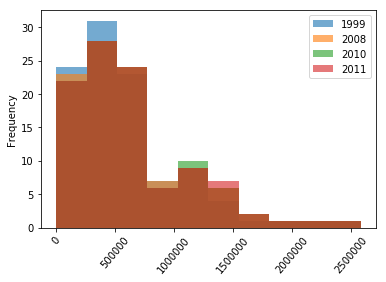

In [303]:
%matplotlib inline
gg = pp.loc[:, 1999:2011]
#pp.hist(column=[1999, 2011])
gg.plot(kind='hist', alpha=0.62, rot=50)

![](jolie_fin_de_page.png)

## Annexe: Récupération de la table sur les départements

In [ ]:
#depts_fr=pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_d%C3%A9partements_fran%C3%A7ais_class%C3%A9s_par_population_et_superficie", thousands=' ')

In [ ]:
# dpts = depts_fr[0].copy()
# dpts.head()

In [ ]:
# # restructuration sous forme MultiIndex
# lev=[['Rang','INSEE','Département','Population','Superficie','Densité'],
#                ['',1931,1999,2008,2010,2011,2012,2015]]
# mI=pd.MultiIndex(levels=lev,
#            labels=[[0, 1,2,3,3,3,3,3,3,3, 4, 5], [0,0,0,1,2,3,4,5,6,7,0,0]],
#            names=[u'', u''])
# dpts.columns=mI

# dpts=dpts.drop(labels=[0,1],axis=0)
# dpts.head()

In [ ]:
# dpts_tab=dpts[['Population', 'Superficie']]
# dpts_tab=dpts_tab.replace("à compléter",np.nan)
# dpts_tab=dpts_tab.replace(np.nan,"")
# dpts_tab.index=np.array(dpts['Département'])
# dpts_tab.head()